# Portfolio Management

# I. Code

# Setup

In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import scipy 
from scipy.stats import norm
print("pandas version %s" % pd.__version__)

pandas version 0.25.1


# Import data

In [2]:
data_1 = pd.read_excel("Portfolio.xlsx",sheet_name="Portfolio")
data_2 = pd.read_excel("Portfolio.xlsx",sheet_name="Param")
data_3 = pd.read_excel("Portfolio.xlsx",sheet_name="Sector")
data_4 = pd.read_excel("Portfolio.xlsx",sheet_name="Rating")

In [3]:
data_1.head()

,Id,Exposure,Rating,LGD,Sector
0,1,1894,1,0.59,2
1,2,1095,4,0.44,1
2,3,1627,6,0.69,1
3,4,1914,10,0.57,3
4,5,1662,8,0.46,4


### Merge data in order to have maturity and correlation in the our portfolio dataframe 

In [4]:
merged_portfolio = data_1.merge(data_4, how='left', on= 'Rating', sort=False).merge(data_3, how='left', on='Sector', sort=False)

In [5]:
merged_portfolio

,Id,Exposure,Rating,LGD,Sector,1Y,3Y,5Y,Correlation
0,1,1894,1,0.59,2,0.001,0.0015,0.00225,0.32
1,2,1095,4,0.44,1,0.016,0.0240,0.03600,0.23
2,3,1627,6,0.69,1,0.036,0.0540,0.08100,0.23
3,4,1914,10,0.57,3,0.100,0.1500,0.22500,0.15
4,5,1662,8,0.46,4,0.064,0.0960,0.14400,0.18
...,...,...,...,...,...,...,...,...,...
95,96,1841,3,0.52,2,0.009,0.0135,0.02025,0.32
96,97,1779,2,0.40,4,0.004,0.0060,0.00900,0.18
97,98,1809,10,0.61,1,0.100,0.1500,0.22500,0.23
98,99,1737,7,0.46,3,0.049,0.0735,0.11025,0.15


### Set Id  as Index. Ids correspond to the 100 entities of our entire portfolio

In [6]:
merged_portfolio = merged_portfolio.set_index(merged_portfolio['Id'])
merged_portfolio.sort_index(inplace=True)
del merged_portfolio["Id"]

In [7]:
merged_portfolio.head(3)

,Exposure,Rating,LGD,Sector,1Y,3Y,5Y,Correlation
Id,,,,,,,,
1,1894,1,0.59,2,0.001,0.0015,0.00225,0.32
2,1095,4,0.44,1,0.016,0.0240,0.03600,0.23
3,1627,6,0.69,1,0.036,0.0540,0.08100,0.23


# Monte Carlo Simulation

###### Monte Carlo simulation is a computational method that can be used for Portfolio Credit Risks. The approach is an example of using Simulation Models for the purpose of establishing a Risk Distribution. Once the distribution is obtained it is possible to estimate various risk measures for the credit portfolio.

In [8]:
def generate(N_simu, N_entities, N_sectors):
    #generate monte carlo simulation for X, the 100 entites and the 5 sectors
    simulations = np.random.randn(N_simu, N_entities + N_sectors + 1)
    #Convert to DataFrime
    mydata = pd.DataFrame(simulations, index = [i for i in range(1,N_simu + 1)])
    mydata.columns = ['X'] + ['X' +str(i) for i in range(1,N_sectors + 1)] + ['E' +str(i) for i in range(1, N_entities + 1)]
    return mydata

In [9]:
# DEFINE PARAMATERS
N_simu = 10000
N_entities = 100
N_sectors = 5

In [10]:
#Generate Simulations 
mydata = generate(N_simu, N_entities, N_sectors)
mydata

,X,X1,X2,X3,X4,X5,E1,E2,E3,E4,...,E91,E92,E93,E94,E95,E96,E97,E98,E99,E100
1,-0.516704,-0.293289,-1.646402,1.255794,0.361760,-2.116018,-1.265212,0.181041,-1.824586,0.175315,...,-0.405518,0.023804,-0.239419,-1.896401,1.729116,1.584820,0.468026,0.403449,-0.057582,-0.698428
2,0.731058,0.423532,0.249176,-0.907172,0.162770,1.578105,-1.835801,1.941728,0.680743,-0.899717,...,-0.368619,0.853160,1.857797,-1.766308,-2.006284,0.598025,0.235974,0.191083,0.681968,1.073816
3,0.295884,0.245099,-1.492979,-0.671457,-0.693417,0.005716,-0.012535,-0.280736,-0.813791,0.331873,...,2.444371,-0.830249,-0.101938,0.872858,0.943601,-0.797999,-1.628401,2.209689,-1.461621,0.893618
4,1.450847,0.458072,-0.854475,-0.373334,1.300262,0.561679,0.147880,-0.789777,1.339788,0.776144,...,-1.103121,0.337160,0.491314,1.550320,0.019692,-0.027581,1.905389,0.422113,0.417578,0.485641
5,1.689560,-2.379968,-0.249060,0.816759,-0.660847,0.209427,-0.131171,-1.270558,0.979460,0.461240,...,0.561591,-1.348042,0.118746,1.418235,0.066224,0.264656,-0.573707,1.790835,1.754036,-0.012681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-0.789543,0.800685,0.172017,-0.319245,-1.572092,0.091481,1.018860,1.309642,-0.610049,-0.761609,...,0.475843,0.045663,1.337451,-0.177070,-1.981225,-0.400378,-1.506539,0.424562,-0.433619,0.596619
9997,3.011834,-0.178033,-0.573538,1.421832,-0.194184,0.276499,-0.215347,-1.877191,-0.536837,-0.119310,...,-0.572471,2.691436,1.739815,-0.826724,-0.770848,-0.752051,-0.250116,-0.033576,-0.049103,-0.045725
9998,1.134716,-0.526870,-1.868709,-0.600443,-0.196369,-0.755913,-0.280666,-0.096069,1.529460,1.059577,...,-1.425378,-1.488585,-0.464290,0.485424,0.035516,1.669973,0.512996,-0.483964,0.750446,0.898754
9999,-3.069992,-0.743038,0.593919,0.657350,1.518217,-1.664055,-0.642910,0.153804,1.080328,-2.887922,...,2.047001,2.733990,-0.261326,0.061669,0.862954,0.023807,-2.069560,-1.947648,-0.460115,-1.362045


In [11]:
mydata.describe()

,X,X1,X2,X3,X4,X5,E1,E2,E3,E4,...,E91,E92,E93,E94,E95,E96,E97,E98,E99,E100
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.001009,-0.010051,0.006356,-0.005010,-0.000923,0.000411,0.003865,-0.004089,-0.004833,-0.002203,...,-0.006506,-0.009435,-0.001981,0.009310,0.012946,0.005973,0.006372,0.010955,-0.020193,0.000973
std,1.014165,1.001077,1.007655,0.995248,0.996059,1.000377,0.991766,0.995806,1.006337,1.001888,...,1.005694,0.994139,1.002500,1.004282,1.011108,0.999557,0.999449,0.996899,1.003898,0.997574
min,-4.460845,-3.548837,-3.734617,-3.688907,-4.009585,-4.211877,-3.828562,-3.756666,-4.622964,-3.688267,...,-3.893913,-3.609809,-3.572000,-3.545014,-3.793536,-3.983030,-4.197417,-3.863337,-3.336404,-3.419254
25%,-0.687164,-0.698190,-0.670636,-0.677875,-0.671628,-0.666653,-0.665110,-0.677345,-0.695432,-0.664614,...,-0.681540,-0.687571,-0.673218,-0.683812,-0.679538,-0.667866,-0.668525,-0.658038,-0.697184,-0.674091
50%,0.002456,-0.029893,0.019203,-0.017440,-0.005322,0.002028,-0.004770,0.001268,0.002888,-0.006373,...,-0.005722,-0.011217,0.000630,0.005659,0.011571,0.015570,0.006614,0.005523,-0.018451,0.001537
75%,0.682574,0.666347,0.686332,0.672838,0.682662,0.680912,0.666893,0.664092,0.674347,0.672283,...,0.680090,0.663607,0.684188,0.683132,0.709661,0.681918,0.675312,0.693518,0.658700,0.655739
max,4.131283,3.865593,3.978795,3.880629,3.790968,3.712794,4.465736,3.524877,4.102192,3.888847,...,3.797745,3.232363,4.054817,3.629523,3.725042,4.138324,3.520184,3.854354,3.614944,3.803561


# Default Model : MG2F

In [12]:
def compute_Z(simu_df, N_entities, N_simu, rho):
    #create the dataframe with nan values
    default = pd.DataFrame(columns=['Z' +str(i) for i in range(1, N_entities + 1)], index = [i for i in range(1, N_simu + 1)])
    #compute Z
    for i in range(1,N_entities + 1):
        default['Z' +str(i)] = np.sqrt(rho) * simu_df['X'] + np.sqrt(1 - merged_portfolio['Correlation'][i]) * simu_df['E' +str(i)] + np.sqrt(merged_portfolio['Correlation'][i]-rho)*simu_df['X' +str(merged_portfolio['Sector'][i])]
    return default

In [13]:
default = compute_Z(mydata, 100, 10000, 0.11)
default

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,...,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99,Z100
1,-1.969168,-0.114107,-1.874038,0.241420,-1.646855,-1.261163,-0.104154,-1.992881,-0.994517,-1.077367,...,-1.168883,-0.054103,-1.020320,-2.502369,1.244323,0.381029,0.348157,0.081055,0.026699,-1.501786
2,-1.157189,2.093040,0.986529,-0.768468,1.527835,0.493578,0.483953,-0.725671,-1.330526,-0.243337,...,0.386193,1.058099,2.377560,-0.863938,-1.371327,0.849795,0.499212,0.556855,0.689773,1.242143
3,-0.596372,-0.063306,-0.531061,0.269814,-0.359192,0.192915,-0.607894,-0.096600,0.972625,-0.426451,...,2.286161,-0.837150,0.008672,0.880557,1.011045,-1.244082,-1.559907,2.122033,-1.383706,0.150861
4,0.211567,-0.053154,1.815532,1.122095,1.935959,-0.425040,0.294678,-0.442046,-0.744247,-0.488238,...,-0.336966,1.130520,1.089140,2.036344,0.657152,0.066878,2.550612,1.010275,0.791513,0.490092
5,0.338063,-1.378992,0.595391,1.148958,-0.447941,-1.403186,0.864782,0.873467,1.546911,0.545442,...,1.125494,-0.835184,0.729401,1.891699,-0.205970,0.664471,-0.133994,1.307370,2.340856,0.435773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.657140,1.164710,-0.519812,-1.027880,-0.925312,1.037947,0.805744,-0.430146,-1.399831,-0.836215,...,0.191190,-0.636449,0.961835,-0.392793,-1.723015,-0.513194,-2.042027,0.388055,-0.725488,0.308950
9997,0.558505,-0.709989,0.466168,1.173280,0.519448,1.558809,2.391168,1.820223,1.607621,1.795257,...,0.569828,3.384735,2.638000,0.342417,0.260824,0.115927,0.721046,0.907777,1.238008,0.698378
9998,-0.711451,0.109529,1.535925,1.233136,1.693594,1.106576,-0.695231,-0.363921,-0.557251,-0.680188,...,-1.125328,-1.023583,-0.265705,0.583745,0.224995,0.897088,0.788926,-0.230847,0.948132,0.261124
9999,-1.276191,-1.140634,-0.327613,-3.549264,-0.677553,-0.302779,-2.166445,-2.079094,-1.087462,-3.481880,...,0.313475,1.859215,-1.751155,-1.462259,-0.518358,-0.726402,-2.490585,-2.984652,-1.310936,-1.869205


# Barrier

In [14]:
#Compute barrier
def compute_barrier(portfolio, maturity):
    portfolio['Barrier' + maturity] = norm.ppf(portfolio[maturity])
    return portfolio

In [15]:
myportfolio = compute_barrier(merged_portfolio, '1Y')
myportfolio

,Exposure,Rating,LGD,Sector,1Y,3Y,5Y,Correlation,Barrier1Y
Id,,,,,,,,,
1,1894,1,0.59,2,0.001,0.0015,0.00225,0.32,-3.090232
2,1095,4,0.44,1,0.016,0.0240,0.03600,0.23,-2.144411
3,1627,6,0.69,1,0.036,0.0540,0.08100,0.23,-1.799118
4,1914,10,0.57,3,0.100,0.1500,0.22500,0.15,-1.281552
5,1662,8,0.46,4,0.064,0.0960,0.14400,0.18,-1.522036
...,...,...,...,...,...,...,...,...,...
96,1841,3,0.52,2,0.009,0.0135,0.02025,0.32,-2.365618
97,1779,2,0.40,4,0.004,0.0060,0.00900,0.18,-2.652070
98,1809,10,0.61,1,0.100,0.1500,0.22500,0.23,-1.281552


# When default

In [16]:
def whendefault(myportfolio,default, N_entities, N_simu, maturity):
    df = pd.DataFrame(columns=['D' +str(i) for i in range(1, N_entities + 1)], index = [i for i in range(1, N_simu + 1)])
    for i in range(1, N_entities + 1):
        df['D' +str(i)] = default['Z' +str(i)].apply(lambda x: 1 if x <= myportfolio['Barrier' + maturity][i] else 0)
    return df    

In [17]:
default_df = whendefault(myportfolio,default, N_entities, N_simu, '1Y')
default_df

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,0,0,0,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,1


# Compute Losses

In [18]:
#compute simualtion loss dataframe
def compute_loss(myportfolio, default_df, N_entities):
    loss_df = default_df.copy()
    loss_df.columns = ['Loss' +str(i) for i in range(1, N_entities + 1)]
    for i in range(1, N_entities + 1):
        loss_df['Loss' +str(i)] = default_df['D' +str(i)].apply(lambda x: x * myportfolio['Exposure'][i] * myportfolio['LGD'][i])
    return loss_df     

In [19]:
simu_loss = compute_loss(myportfolio, default_df, N_entities)
simu_loss

,Loss1,Loss2,Loss3,Loss4,Loss5,Loss6,Loss7,Loss8,Loss9,Loss10,...,Loss91,Loss92,Loss93,Loss94,Loss95,Loss96,Loss97,Loss98,Loss99,Loss100
1,0.0,0.0,1122.63,0.00,764.52,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,896.56,0.00,0.0,0.0,0.00,0.0,834.72
2,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
3,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
4,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
5,0.0,0.0,0.00,0.00,0.00,968.49,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,1359.36,0.0,0.0,0.00,0.0,0.00
9997,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
9998,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00
9999,0.0,0.0,0.00,1090.98,0.00,0.00,908.44,0.0,0.0,1251.2,...,0.0,0.0,834.36,896.56,0.00,0.0,0.0,1103.49,0.0,834.72


# Rolling Mean, Stdv and Portfolio Loss

In [20]:
def loss_simu_df(loss, confidence, n_simu):
    loss_dataframe = pd.DataFrame(loss.sum(axis=1))
    loss_dataframe.columns = ['Loss']
    loss_dataframe['Rolling_mean'] = loss_dataframe.expanding().mean()
    loss_dataframe['Rolling Stdev'] = loss_dataframe['Loss'].expanding().std()
    a = norm.ppf(confidence)
    N = np.sqrt(np.array(range (1,n_simu + 1)))
    loss_dataframe['Born_inf'] = loss_dataframe['Rolling_mean'] - a*loss_dataframe['Rolling Stdev']/N
    loss_dataframe['Born_sup'] = loss_dataframe['Rolling_mean'] + a*loss_dataframe['Rolling Stdev']/N
    loss_dataframe['Error'] = loss_dataframe['Born_sup'] - loss_dataframe['Born_inf']
    return loss_dataframe

In [21]:
loss_dataframe = loss_simu_df(simu_loss, 0.99, 10000)
loss_dataframe

,Loss,Rolling_mean,Rolling Stdev,Born_inf,Born_sup,Error
1,11640.09,11640.090000,NaN,NaN,NaN,NaN
2,572.46,6106.275000,7825.996225,-6767.303761,18979.853761,25747.157521
3,1325.52,4512.690000,6183.983175,-3793.126463,12818.506463,16611.632926
4,0.00,3384.517500,5530.418131,-3048.320730,9817.355730,12865.676461
5,968.49,2901.312000,4909.845344,-2206.765390,8009.389390,10216.154779
...,...,...,...,...,...,...
9996,6253.04,3699.971189,3384.887453,3621.211179,3778.731200,157.520022
9997,0.00,3699.601081,3384.920421,3620.844243,3778.357920,157.513677
9998,766.80,3699.307743,3384.878203,3620.555825,3778.059660,157.503835
9999,15281.14,3700.466042,3386.690081,3621.675909,3779.256174,157.580265


In [22]:
def plot_loss(rolling_mean, rolling_stdv, born_inf, born_sup):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(14,10))
    fig.suptitle('Convergence perte moyenne portefeuille')
    ax1.plot(rolling_mean, label='Rolling Mean', color='orange')
    ax1.plot(born_inf, label='Born_inf', color='green')
    ax1.plot(born_sup, label='Born_sup', color='red')
    ax2.plot(rolling_stdv, label='Rolling Stdv', color='blue')
    #plt.ylabel('Loss', fontsize=16)
    plt.xlabel('Simulation')
    ax1.legend()
    ax2.legend()
    plt.show()

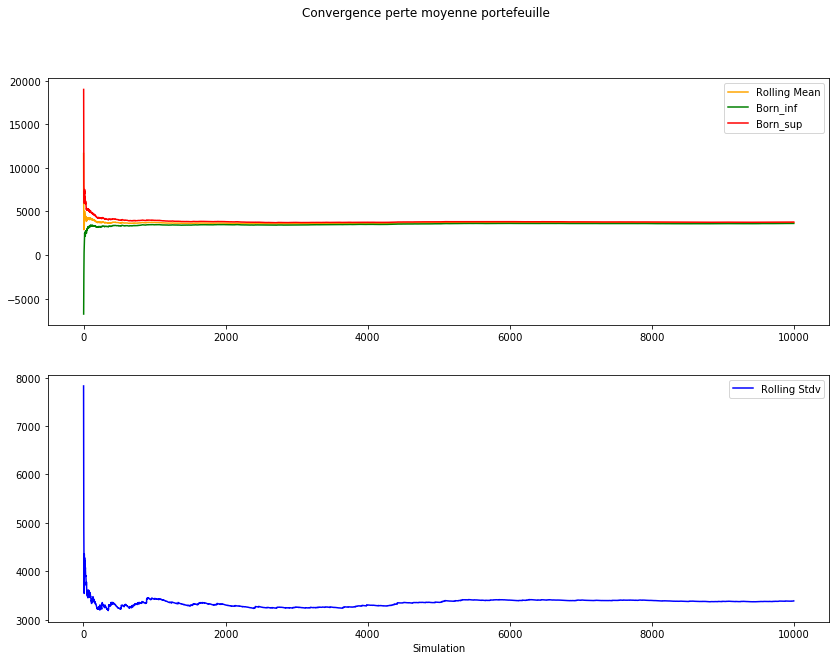

In [23]:
plot_loss(loss_dataframe['Rolling_mean'], loss_dataframe['Rolling Stdev'], loss_dataframe['Born_inf'], loss_dataframe['Born_sup'])

# Value at Risk : VaR

In [24]:
def var(data, confidence):
    return data.quantile(confidence)

In [25]:
confidence = data_2['IC'][0]
VaR = var(loss_dataframe['Loss'], confidence)

In [26]:
print("Value at Risk : {:.2f}".format(VaR))

Value at Risk : 15438.49


# Mean Loss for all our simulations

In [27]:
mean_loss = loss_dataframe['Loss'].mean()
print("Mean Loss : {:.2f}".format(mean_loss))

Mean Loss : 3700.17


# Compute Portfolio Expected Loss 

In [28]:
def expected_loss(maturity, data):
    data['Expected Loss'] = data['Exposure']*data['LGD']*data[maturity]
    return data

In [29]:
myportfolio = expected_loss('1Y', myportfolio)
myportfolio

,Exposure,Rating,LGD,Sector,1Y,3Y,5Y,Correlation,Barrier1Y,Expected Loss
Id,,,,,,,,,,
1,1894,1,0.59,2,0.001,0.0015,0.00225,0.32,-3.090232,1.11746
2,1095,4,0.44,1,0.016,0.0240,0.03600,0.23,-2.144411,7.70880
3,1627,6,0.69,1,0.036,0.0540,0.08100,0.23,-1.799118,40.41468
4,1914,10,0.57,3,0.100,0.1500,0.22500,0.15,-1.281552,109.09800
5,1662,8,0.46,4,0.064,0.0960,0.14400,0.18,-1.522036,48.92928
...,...,...,...,...,...,...,...,...,...,...
96,1841,3,0.52,2,0.009,0.0135,0.02025,0.32,-2.365618,8.61588
97,1779,2,0.40,4,0.004,0.0060,0.00900,0.18,-2.652070,2.84640
98,1809,10,0.61,1,0.100,0.1500,0.22500,0.23,-1.281552,110.34900


In [30]:
def E_Loss(portfolio):
    EL = portfolio['Expected Loss'].sum()
    return EL

In [31]:
EL = E_Loss(myportfolio)
print("Expected Loss : {:.2f}".format(EL))

Expected Loss : 3683.22


# Expected Shortfall : ES

In [32]:
def expected_shortfall(loss, value_at_risk):
    ES = loss['Loss'][loss['Loss'] > value_at_risk ].mean()
    return ES

In [33]:
##Number of loss values greater than the VaR and compute ES
number = loss_dataframe['Loss'][loss_dataframe['Loss'] > VaR].count()
ES = expected_shortfall(loss_dataframe, VaR)
print("Number of values greater than the VaR : {:.2f}".format(number))
print("Expected Shortfall : {:.2f}".format(ES))

Number of values greater than the VaR : 100.00
Expected Shortfall : 18055.89


# All indicators

In [34]:
def compute_indicators(loss, confidence, portfolio):
    VaR = var(loss['Loss'], confidence)
    mean_loss = loss['Loss'].mean()
    EL = E_Loss(portfolio)
    expected_shortfall(loss, VaR)
    UL = VaR - EL
    porfolio_indicators = pd.DataFrame({'VaR': VaR, 'Average Loss' : mean_loss, 'Expected Loss': EL, 'Unexpected Loss': UL, 'Expected Shortfall':ES }, index = ['value'])
    return porfolio_indicators 

In [35]:
porfolio_indicators = compute_indicators(loss_dataframe, data_2['IC'][0], myportfolio)
porfolio_indicators

,VaR,Average Loss,Expected Loss,Unexpected Loss,Expected Shortfall
value,15438.4945,3700.168742,3683.2199,11755.2746,18055.8895


# Indicators analysis

In [36]:
c_list = [0.8, 0.85, 0.90, 0.95, 0.97, 0.99]
dic = {}
for i in c_list:
    dic[i] = compute_indicators(loss_dataframe, i, myportfolio)['VaR']
dic 


{0.8: value    5917.516
 Name: VaR, dtype: float64, 0.85: value    6888.548
 Name: VaR, dtype: float64, 0.9: value    8181.246
 Name: VaR, dtype: float64, 0.95: value    10339.778
 Name: VaR, dtype: float64, 0.97: value    12156.6875
 Name: VaR, dtype: float64, 0.99: value    15438.4945
 Name: VaR, dtype: float64}

In [37]:
dd = pd.DataFrame(dic)
dd

,0.80,0.85,0.90,0.95,0.97,0.99
value,5917.516,6888.548,8181.246,10339.778,12156.6875,15438.4945


### It can be seen above that when the chosen confidence level reaches high levels, the VaR increases very quickly. 
### This shows the importance of the choice of the confidence level in the calculation of the capital requirement.

# CDO

In [38]:
def compute_cdo(loss, portfolio, strike, size):
    df = pd.DataFrame(loss['Loss'])
    total = portfolio['Exposure'].sum()
    df['Loss %'] = (df['Loss']/total)*100
    df['Tranche'] = df['Loss %'] - 7
    df.loc[df['Tranche'] < 0, 'Tranche'] = 0
    df.loc[df['Tranche'] > size, 'Tranche'] = size
    df['Tranche 100%'] = (df['Tranche']/size)*100
    percent = df['Tranche 100%'].mean()/100
    price = (percent * size * total)/100
    return price, df

In [39]:
price, dataframe = compute_cdo(loss_dataframe, myportfolio, 7, 2)

In [40]:
price

89.29195500000003

# II. IPYWIDGET INTERACTIVE PLOTTING

# 1. Setup

In [41]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
from ipywidgets import FloatSlider, IntSlider
from IPython.display import display 

# 2. Main function

In [42]:
def display_result(confidence, maturity, global_corr, strike, size, n_simu):
    ###Arguments
    
    #confidence : interval de confiance
    #maturity : 1Y, 3Y ou 5Y
    #global_corr : corrélation
    
    
    #Compute portfolio barrier
    barrier = compute_barrier(merged_portfolio, maturity)
    #compute the expected loss column and return portfolio
    portfolio = expected_loss(maturity, barrier)
    
    #generate monte carlo simulations
    simulations = generate(n_simu, N_entities, N_sectors)
    #Compute Z_i, our default model : MG2F
    Z_i = compute_Z(simulations, N_entities, n_simu, global_corr)
    #Get the default dataframe with 1 and 0 based on whether we're default or not
    D_i = whendefault(portfolio,Z_i, N_entities, n_simu, maturity)
    #Compute our assets losses for the n_simu simulations
    Loss_i = compute_loss(portfolio, D_i, N_entities)
    #Get the Portfolio Losses which is a datafame composed of Loss, rolling mean & stdv, Born_inf, Born_sup
    simu_losses = loss_simu_df(Loss_i, confidence, n_simu)
    #Compute our porfolio indicators (Var, EL, UL, ES)
    indicators = compute_indicators(simu_losses, confidence, portfolio)
    #Get the price : CDO
    price_cdo, df = compute_cdo(simu_losses, portfolio, strike, size)
    
    #plot rolling mean and stdv
    plotted = plot_loss(simu_losses['Rolling_mean'], simu_losses['Rolling Stdev'], simu_losses['Born_inf'], simu_losses['Born_sup'])
    
    print('--------------------------------------------------------')
    
    print(' ')
    print('\033[1m' + 'THIS IS YOUR PORTFOLIO')
    
    display(portfolio.head(10))
    
    print('\033[94m')
    
    print('\033[1m' + 'PORTFOLIO INDICATORS')
    
    display(indicators)
    
    print('\033[92m')
    print('--------------------------------------------------------')
    
    print('\033[1m' + 'COLLATERALIZED DEBT OBLIGATION : CDO')
    
    print('')
    
    print("Price : {:.2f}".format(price_cdo))

    
#Defines our arguments    
mat = ['1Y', '3Y', '5Y'] 
c_list = [0.8, 0.85, 0.90, 0.95, 0.97, 0.99]
nb_simu = IntSlider(min=0, max=100000, step=100)
rho_list = FloatSlider(min=0, max=1, step=0.01)
s_values = IntSlider(min=1, max=50, step=1)
size_values = IntSlider(min=1, max=10, step=1)

interact_manual(display_result, confidence=c_list, maturity=mat, global_corr=rho_list, strike=s_values, size=size_values, n_simu=nb_simu)

interactive(children=(Dropdown(description='confidence', options=(0.8, 0.85, 0.9, 0.95, 0.97, 0.99), value=0.8…

<function __main__.display_result(confidence, maturity, global_corr, strike, size, n_simu)>

# All in one 

In [43]:
class Portfolio():

    def __init__(self, N_simu, N_entities, N_sectors, maturity, rho, dataframe):
        self.N_simu = N_simu
        self.N_entities = N_entities
        self.N_sectors = N_sectors
        self.maturity = maturity
        self.rho = rho
        self.dataframe = dataframe
    
    
    def getData(self):
        barrier = self.compute_barrier(self.dataframe)
        myportfolio = self.expected_loss(self.maturity, barrier)
        return myportfolio
    
    def getPlot(self):
        
        #Generate Simulations 
        mydata = self.generate_simu()
        #Compute Z
        default = self.compute_Z()
        #when default
        myportfolio = self.getData()
        default_df = self.whendefault(myportfolio, default)
        loss_df = self.compute_loss(myportfolio, default_df)
        loss_plot = self.rolling_mean_stdv(loss_df)[['Rolling_mean', 'Rolling Stdev']]
        plt_obj = loss_plot.plot()
        plt_obj.set_ylabel("Perte moyenne")
        plt_obj.set_title("Evolution moyenne perte et stdv en fonction des simulations")
        fig = plt_obj.get_figure()
        return fig        
        
    
    def generate_simu(self):
        #generate monte carlo simulation for X, the 100 entites and the 5 sectors
        simulations = np.random.randn(self.N_simu, self.N_entities + self.N_sectors + 1)
        #Convert to DataFrime
        mydata = pd.DataFrame(simulations, index = [i for i in range(1,self.N_simu + 1)])
        mydata.columns = ['X'] + ['X' +str(i) for i in range(1,self.N_sectors + 1)] + ['E' +str(i) for i in range(1, self.N_entities + 1)]
        return mydata
    
    
    def compute_Z(self):
        #create the dataframe with nan values
        default = pd.DataFrame(columns=['Z' +str(i) for i in range(1, self.N_entities + 1)], index = [i for i in range(1, self.N_simu + 1)])
        #compute Z
        simu_df = self.generate_simu()
        for i in range(1,self.N_entities + 1):
            default['Z' +str(i)] = np.sqrt(self.rho) * simu_df['X'] + np.sqrt(1 - merged_portfolio['Correlation'][i]) * simu_df['E' +str(i)] + np.sqrt(merged_portfolio['Correlation'][i]-self.rho)*simu_df['X' +str(merged_portfolio['Sector'][i])]
        return default
    
    #Compute barrier
    def compute_barrier(self,portfolio):
        portfolio['Barrier' + self.maturity] = norm.ppf(portfolio[self.maturity])
        return portfolio
    
    def whendefault(self, myportfolio,default):
        df = pd.DataFrame(columns=['D' +str(i) for i in range(1, self.N_entities + 1)], index = [i for i in range(1, self.N_simu + 1)])
        for i in range(1, self.N_entities + 1):
            df['D' +str(i)] = default['Z' +str(i)].apply(lambda x: 1 if x <= myportfolio['Barrier' + self.maturity][i] else 0)
        return df 
    
    #compute simualtion loss dataframe
    def compute_loss(self, myportfolio, default_df):
        loss_df = default_df.copy()
        loss_df.columns = ['Loss' +str(i) for i in range(1, self.N_entities + 1)]
        for i in range(1, N_entities + 1):
            loss_df['Loss' +str(i)] = default_df['D' +str(i)].apply(lambda x: x * myportfolio['Exposure'][i] * myportfolio['LGD'][i])
        return loss_df 
    
    def rolling_mean_stdv(self, loss_df):
        loss_dataframe = pd.DataFrame(loss_df.sum(axis=1))
        loss_dataframe.columns = ['Loss']
        loss_dataframe['Rolling_mean'] = loss_dataframe.expanding().mean()
        loss_dataframe['Rolling Stdev'] = loss_dataframe['Loss'].expanding().std()
        return loss_dataframe
    

    
    def expected_loss(self, maturity, data):
        data['Expected Loss'] = data['Exposure']*data['LGD']*data[maturity]
        return data
      

In [44]:
portfolio_output = Portfolio(N_simu, N_entities, N_sectors, '1Y', 0.11, merged_portfolio).getData()

In [45]:
portfolio_output

,Exposure,Rating,LGD,Sector,1Y,3Y,5Y,Correlation,Barrier1Y,Expected Loss
Id,,,,,,,,,,
1,1894,1,0.59,2,0.001,0.0015,0.00225,0.32,-3.090232,1.11746
2,1095,4,0.44,1,0.016,0.0240,0.03600,0.23,-2.144411,7.70880
3,1627,6,0.69,1,0.036,0.0540,0.08100,0.23,-1.799118,40.41468
4,1914,10,0.57,3,0.100,0.1500,0.22500,0.15,-1.281552,109.09800
5,1662,8,0.46,4,0.064,0.0960,0.14400,0.18,-1.522036,48.92928
...,...,...,...,...,...,...,...,...,...,...
96,1841,3,0.52,2,0.009,0.0135,0.02025,0.32,-2.365618,8.61588
97,1779,2,0.40,4,0.004,0.0060,0.00900,0.18,-2.652070,2.84640
98,1809,10,0.61,1,0.100,0.1500,0.22500,0.23,-1.281552,110.34900


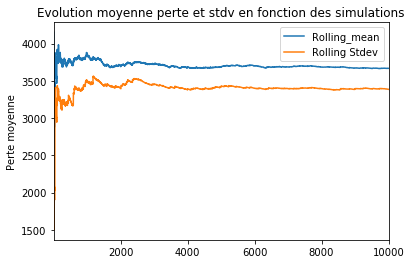

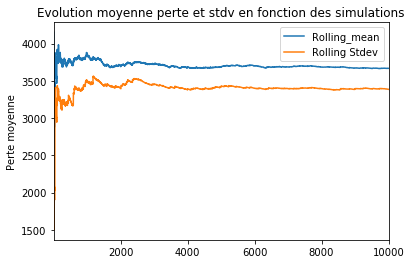

In [46]:
plot = portfolio_output = Portfolio(N_simu, N_entities, N_sectors, '1Y', 0.11, merged_portfolio).getPlot()
plot